In [1]:
import pandas as pd                   # importing pandas library
import numpy as np                    # importing numpy library
import matplotlib.pyplot as plt       # Libraries for plotting
import seaborn as sns                 # Libraries for plotting

# Load the dataset into python environment

In [2]:
car = pd.read_csv("/content/car_age_price.csv")

In [3]:
car

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
car.isna().sum()

Year     0
Price    0
dtype: int64

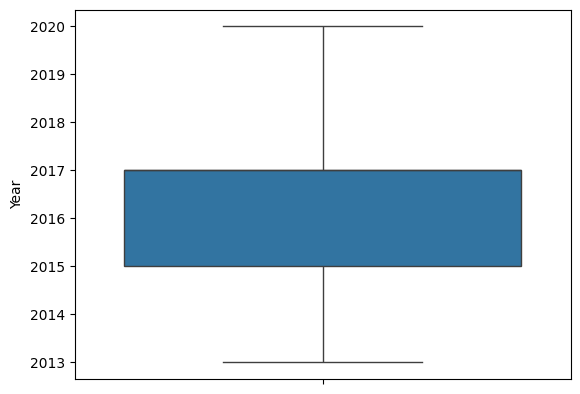

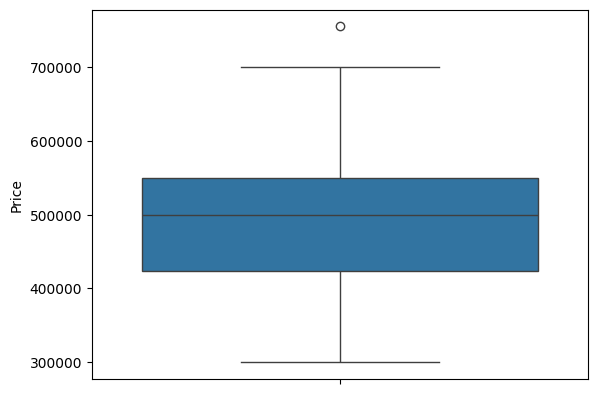

In [6]:
# Check each column in the DataFrame and creating the boxplot
for i in car.columns:
  sns.boxplot(car[i])
  plt.show()

### Inference : As we have negligible outliers, we are not handling the outliers.

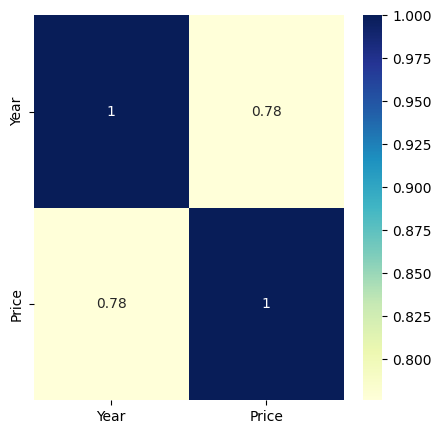

In [7]:
#  Creating a heatmap to visualize the correlation matrix of DataFrame car.
plt.figure(figsize=(5,5))
sns.heatmap(car.corr(), annot=True, cmap="YlGnBu");
plt.show()

In [8]:
#   Calculates the pairwise correlation of columns in DataFrame car.
car.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


# Model Selection and Evaluation

In [9]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = car.drop('Price', axis=1)
y = car['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((84, 1), (84,), (28, 1), (28,))

In [10]:
X_train.head()

,Year
81,2014
77,2015
15,2017
30,2019
45,2018


In [11]:
y_train.head()

81    390000
77    325000
15    500000
30    650000
45    450000
Name: Price, dtype: int64

In [12]:
# importing libraries for Label encoding and Scaling
from sklearn.preprocessing import StandardScaler

In [13]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Importing LinearRegression and Lasso Libraries
from sklearn.linear_model import LinearRegression, Lasso

In [15]:
#  Trying the linear regression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
# Predicting
linear_pred = lin_model.predict(X_test_scaled)
linear_pred

array([599223.07304102, 505265.04214993, 552244.05759547, 552244.05759547,
       552244.05759547, 411307.01125884, 505265.04214993, 552244.05759547,
       599223.07304102, 599223.07304102, 317348.98036775, 505265.04214993,
       411307.01125884, 646202.08848656, 552244.05759547, 599223.07304102,
       317348.98036775, 411307.01125884, 505265.04214993, 505265.04214993,
       505265.04214993, 505265.04214993, 505265.04214993, 505265.04214993,
       505265.04214993, 505265.04214993, 411307.01125884, 411307.01125884])

In [16]:
#  Trying the Lasso regression
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
# Predicting
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_pred

array([599221.54612087, 505264.77888783, 552243.16250435, 552243.16250435,
       552243.16250435, 411308.0116548 , 505264.77888783, 552243.16250435,
       599221.54612087, 599221.54612087, 317351.24442177, 505264.77888783,
       411308.0116548 , 646199.92973738, 552243.16250435, 599221.54612087,
       317351.24442177, 411308.0116548 , 505264.77888783, 505264.77888783,
       505264.77888783, 505264.77888783, 505264.77888783, 505264.77888783,
       505264.77888783, 505264.77888783, 411308.0116548 , 411308.0116548 ])

In [17]:
# Libraries for cross validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Evaluating the performance of Regression models

In [18]:
# Evaluate performance of the models using Mean Squared Error (MSE), Mean Absolute Error (MAE), R2 score

linear_mse = mean_squared_error(y_test, linear_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Linear Mean Squared error : {linear_mse}")
print(f"Lasso Mean Squared error : {lasso_mse}")

linear_mae = mean_absolute_error(y_test, linear_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print(f"\nLinear Mean Absolute error : {linear_mae}")
print(f"Lasso Mean Absolute error : {lasso_mae}")

print(f'\nR2 score Linear Regression :',r2_score(y_test, linear_pred))
print(f'R2 score Lasso Regression :',r2_score(y_test, lasso_pred))

linear_rmse = np.sqrt(linear_mse)
lasso_rmse = np.sqrt(lasso_mse)
print(f'\nLinear Regression RMSE: {linear_rmse}')
print(f'Lasso Regression RMSE: {lasso_rmse}')

Linear Mean Squared error : 3878767151.0726194
Lasso Mean Squared error : 3878717684.2604876

Linear Mean Absolute error : 49985.62530006061
Lasso Mean Absolute error : 49985.091254096355

R2 score Linear Regression : 0.4347961632109232
R2 score Lasso Regression : 0.4348033713858205

Linear Regression RMSE: 62279.74912499744
Lasso Regression RMSE: 62279.351989728406




a)  If the MSE, MAE, R2 score and RMSE for both linear regression and lasso regression are the same, it indicates that both models are performing equally well on the test data.

b)  If the MSE, MAE, R2 score and RMSE for both linear regression and lasso regression are not the same, choose the model with lower RMSE.


### *Inference : In this case, we can select either Linear/Lasso as the values of MSE, MAE, R2 score and RMSE are almost same*


# Choosing the better performing model and predicting the possible price of a 2022 model second-hand grand i10

In [19]:
# Predict the price for a 2022 model using the better performing model
# Convert the year to the standardized scale before prediction
price_2022_scaled = scaler.transform(np.array([[2022]]))

#  Using Linear
pred_2022_price_lin = lin_model.predict(price_2022_scaled)
#  Using Lasso
pred_2022_price_las = lasso_model.predict(price_2022_scaled)

print(f'Predicted price for a 2022 model second-hand Hyundai grand i10')
print(f'\n Using Linear: {pred_2022_price_lin[0]}')
print(f'\n Using Lasso: {pred_2022_price_las[0]}\n')

Predicted price for a 2022 model second-hand Hyundai grand i10

 Using Linear: 740160.1193776521

 Using Lasso: 740156.6969704162



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Inference : Approximately same values are predicted using both Linear and Lasso models.